In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###**1. Obtener y descargar los datos**

In [3]:
ruta = ("https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv")

In [4]:
df = pd.read_csv(ruta)

###**2. Obtener información del dataframe**
Usar las funciones shape, columns, head(), dtypes, info(), isna()

In [5]:
#Voy a usar ahora la función shape para obtener información del tamaño del dataframe. Es un arreglo de 30000 filas y 25 columnas.

df.shape

(30000, 25)

In [6]:
#Voy a usar ahora la función columns para obtner el nombre de las columnas. Tiene el ID (identificador único de cada fila)
#las variables están identificadas desde X1 hasta X23 y la salida Y.

df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [7]:
#Voy a traner una muestra del dataframe con head

df.head(3)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0


In [8]:
#Voy a obtener ahora la clase de cada una des las variables. Al parecer todas son variables numéricas: enteros o racionales.

df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [9]:
#Con este procedimiento estoy obteniendo información del dataframe: el tipo de datos que contiene cada columna
#y la cantidad de valores na en cada columna.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [10]:
#Usaré ahora la función isna(). Esta función compara cada uno de los valores del dataframe, pero para obtener el resumen
#voy a poner el .sum() para que sume la cantidad de valores verdaderos, es decir, aquellos que tienen valores nulos.

df.isna().sum()

ID      0
X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

###**3. Limpieza de los datos**

Para la limpieza de los datos voy a usar dos cosas:
1. Cuando no tiene los datos de salida, es decir, cuando el valor de salida es NA entonces voy a borrar completamente esa fila. Apenas son tres filas.
2. Para los demás casos, voy a usar no la media sino la moda, dado que no sé si los datos se encuentran centrados.

In [11]:
#Voy a crear primero un dataframe de copia para hacer el ejercicio de preparación de datos.

df_respaldo = df.copy()

In [12]:
#Voy ahora a eliminar NaN de la salida Y
df_respaldo.dropna(subset = ["Y"], inplace = True)

#Voy tambien a reemplazar los valores nulos en las variables desde la X2 a la X23 con la moda de los datos de la columna.

columnas = ["X2", "X3", "X4","X5", "X6", "X7", "X8", "X9", 
            "X10", "X11", "X12", "X13", "X14", "X15", "X16", "X17", "X18", "X19",  
            "X20", "X21", "X22", "X23"]


for columna in columnas:
  #print(columna)
  df_respaldo[columna].fillna(df_respaldo[columna].mode()[0], inplace = True)


In [13]:
#Voy a verificar ahora los valores nulos al final de la transformación

df_respaldo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29997 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      29997 non-null  int64  
 1   X1      29997 non-null  int64  
 2   X2      29997 non-null  float64
 3   X3      29997 non-null  float64
 4   X4      29997 non-null  float64
 5   X5      29997 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29997 non-null  float64
 8   X8      29997 non-null  float64
 9   X9      29997 non-null  float64
 10  X10     29997 non-null  float64
 11  X11     29997 non-null  float64
 12  X12     29997 non-null  float64
 13  X13     29997 non-null  float64
 14  X14     29997 non-null  float64
 15  X15     29997 non-null  float64
 16  X16     29997 non-null  float64
 17  X17     29997 non-null  float64
 18  X18     29997 non-null  float64
 19  X19     29997 non-null  float64
 20  X20     29997 non-null  float64
 21  X21     29997 non-null  float64
 22

In [14]:
#Voy a aplicar ahora las mismas transformaciones al df original.

#Voy ahora a eliminar NaN de la salida Y
df.dropna(subset = ["Y"], inplace = True)

#Voy tambien a reemplazar los valores nulos en las variables desde la X2 a la X23 con la moda de los datos de la columna.

columnas = ["X2", "X3", "X4","X5", "X6", "X7", "X8", "X9", 
            "X10", "X11", "X12", "X13", "X14", "X15", "X16", "X17", "X18", "X19",  
            "X20", "X21", "X22", "X23"]


for columna in columnas:
  #print(columna)
  df[columna].fillna(df[columna].mode()[0], inplace = True)

#Con esta última línea calculo la cantidad de valores nulos que quedaon en el arreglo.
df.isna().sum()


ID     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

###**4. Estadística descriptiva del arreglo**###

In [15]:
#df.drop(columns = ["ID"], inplace = True)
df.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,...,29997.000000,29997.000000,29997.000000,29997.000000,2.999700e+04,29997.000000,29997.00000,29997.000000,29997.000000,29997.000000
mean,14999.803847,167496.072274,1.603794,1.853085,1.551955,35.482782,-0.016768,-0.133813,-0.166517,-0.220822,...,43258.340334,40305.674001,38872.062573,5662.001967,5.921304e+03,5224.752375,4825.96513,4799.017002,5215.912191,0.221189
std,8659.837419,129748.803871,0.489116,0.790317,0.521963,9.217726,1.123708,1.197088,1.195840,1.168970,...,64338.448338,60802.030849,59557.323940,16562.945844,2.304202e+04,17607.084239,15666.86068,15279.005275,17778.306661,0.415054
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000
25%,7501.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2316.000000,1759.000000,1255.000000,1000.000000,8.320000e+02,390.000000,294.00000,250.000000,117.000000,0.000000
50%,15000.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19037.000000,18094.000000,17068.000000,2100.000000,2.009000e+03,1800.000000,1500.00000,1500.000000,1500.000000,0.000000
75%,22499.000000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54515.000000,50180.000000,49205.000000,5006.000000,5.000000e+03,4505.000000,4013.00000,4031.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.00000,426529.000000,528666.000000,1.000000


###***Descripción de las medias***###

1. El método describe trajo caracterización de todas las columnas. Eso quiere decir que todas las variables son numéricas. Eso ya se sabía desde cuando aplicamos el método dtypes.

2. Para el caso de las variables categóricas, se observa que los valores de los percentiles son tran valores enteros. Este es el caso de X2 a X10.

3. Para el caso de las variables numéricas contínuas, la media ya se parece a la moda por lo que podemos pensar que se trata de una distribución centrada.



###**5. Conteo de variables categóricas**###

In [16]:
#Definición del vector con las variables categóricas, que van desde la X2 hasta la X11. X5 la saqué porque es la edad

var_categoricas = ["X2", "X3", "X4","X6", "X7", "X8", "X9", "X10", "X11"]


for var in var_categoricas:
  print("\n\nConteo variable categorica ", var)
  print(pd.value_counts(df[var]))




Conteo variable categorica  X2
2.0    18112
1.0    11885
Name: X2, dtype: int64


Conteo variable categorica  X3
2.0    14030
1.0    10584
3.0     4915
5.0      280
4.0      123
6.0       51
0.0       14
Name: X3, dtype: int64


Conteo variable categorica  X4
2.0    15965
1.0    13655
3.0      323
0.0       54
Name: X4, dtype: int64


Conteo variable categorica  X6
 0.0    14738
-1.0     5684
 1.0     3688
-2.0     2759
 2.0     2665
 3.0      322
 4.0       76
 5.0       26
 8.0       19
 6.0       11
 7.0        9
Name: X6, dtype: int64


Conteo variable categorica  X7
 0.0    15732
-1.0     6047
 2.0     3925
-2.0     3782
 3.0      326
 4.0       99
 1.0       28
 5.0       25
 7.0       20
 6.0       12
 8.0        1
Name: X7, dtype: int64


Conteo variable categorica  X8
 0.0    15767
-1.0     5935
-2.0     4085
 2.0     3817
 3.0      240
 4.0       76
 7.0       27
 6.0       23
 5.0       21
 1.0        4
 8.0        2
Name: X8, dtype: int64


Conteo variable categorica  X9


###***6. Escalamiento de los datos.

In [17]:
#Voy a comenzar escalando apenas los valores que no son categóricos
#Separamos las variables categoricas y dejamos afuera la variable y (obejtivo)
nonCategorical = [df.iloc[:,1:2].copy(),df.iloc[:,12:-1].copy()]

new_df = pd.concat(nonCategorical,axis =1, sort=False)


print(new_df)

           X1       X12       X13       X14      X15      X16      X17  \
0       20000    3913.0    3102.0     689.0      0.0      0.0      0.0   
1      120000    2682.0    1725.0    2682.0   3272.0   3455.0   3261.0   
2       90000   29239.0   14027.0   13559.0  14331.0  14948.0  15549.0   
3       50000   46990.0   48233.0   49291.0  28314.0  28959.0  29547.0   
4       50000    8617.0    5670.0   35835.0  20940.0  19146.0  19131.0   
...       ...       ...       ...       ...      ...      ...      ...   
29995  220000  188948.0  192815.0  208365.0  88004.0  31237.0  15980.0   
29996  150000    1683.0    1828.0    3502.0   8979.0   5190.0      0.0   
29997   30000    3565.0    3356.0    2758.0  20878.0  20582.0  19357.0   
29998   80000   -1645.0   78379.0   76304.0  52774.0  11855.0  48944.0   
29999   50000   47929.0   48905.0   49764.0  36535.0  32428.0  15313.0   

           X18      X19      X20     X21      X22     X23  
0          0.0    689.0      0.0     0.0      0.0  

Voy ahora a estandarizar los datos no categóricos

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Escalar los datos con standarizacion
sc = StandardScaler()
scaledData = sc.fit_transform(new_df)

###**Determinar los componentes principales**

In [19]:
#Realizamos la extraccion de componentes principales
pca = PCA()
pca.fit(scaledData)
pcaData = pca.transform(scaledData)

#Creamos un diccionario con los valores promedio de varianza y la varianza acumulada de los componentes principales
dictionaryVariance = {
    'Porcentaje de varianza':np.round(pca.explained_variance_ratio_,3)*100,
    'Porcentaje acumulado de varianza':np.cumsum(pca.explained_variance_ratio_)*100
    }

#Creamos las etiquetas para los componentes principales
labels = [f'PC{i+1}'for i in range(len(new_df.columns))]
frameVariance = pd.DataFrame(dictionaryVariance)
frameVariance.index = labels
print(frameVariance)
print('\n')
print('--------Cantidad de varianza por componente-------------')
varPCA = pd.DataFrame(pca.explained_variance_)
varPCA.index = labels
print(varPCA)

      Porcentaje de varianza  Porcentaje acumulado de varianza
PC1                     45.5                         45.491954
PC2                     13.2                         58.664040
PC3                      7.2                         65.909655
PC4                      6.8                         72.708492
PC5                      6.7                         79.427645
PC6                      6.0                         85.444813
PC7                      5.7                         91.142750
PC8                      5.6                         96.729470
PC9                      2.0                         98.763825
PC10                     0.5                         99.310078
PC11                     0.3                         99.626108
PC12                     0.2                         99.821204
PC13                     0.2                        100.000000


--------Cantidad de varianza por componente-------------
             0
PC1   5.914151
PC2   1.712428
PC3   0.941961

Ahora voy a crear un gráfico con los componentes principales de la varianza


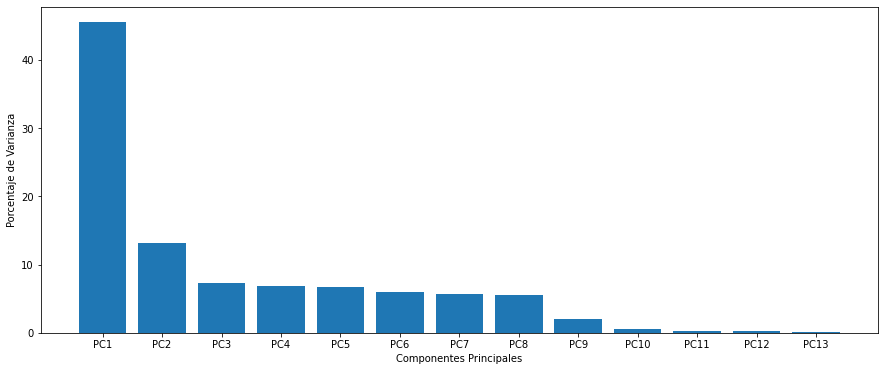

In [20]:

pcaVariations = np.round(pca.explained_variance_ratio_ *100,decimals = 2)

#Generamos etiquetas para realizar una visualizacion de nuestros componentes principales
labels = ['PC'+str(x) for x in range(1,len(pcaVariations)+1)]
plt.figure(figsize=(15, 6))


plt.bar(x=range(1,len(pcaVariations)+1),height = pcaVariations,tick_label = labels)
plt.ylabel('Porcentaje de Varianza')
plt.xlabel('Componentes Principales')
plt.show()

Con esto observamos que el 70% de la varianza es explicada por las primeras cuatro variables del dataframe sin las variables categóricas. Voy a entender ahora cuáles son estas cuatro variables.

In [21]:

scaledDataDf = pd.DataFrame(scaledData.transpose(),index = new_df.columns)

#Calculamos el total de varianza de las variables originales
totalVariableVariance = scaledDataDf.transpose().var().sum()

#Obtenemos el diccionario de porcentajes de varianza que resulta ser igual para cada variable
dictionaryVariableVariance = {
    'Porcentaje de varianza':(scaledDataDf.transpose().var()/totalVariableVariance)*100,
    'Porcentaje acumulado de varianza':(scaledDataDf.transpose().var().cumsum()/totalVariableVariance)*100
    }

print(pd.DataFrame(dictionaryVariableVariance))
print('Varianza total por variables originales:', totalVariableVariance)
print('Notamos que es la misma que la varianza de PCA')
print('Varianza total por componentes:',pca.explained_variance_.sum())

     Porcentaje de varianza  Porcentaje acumulado de varianza
X1                 7.692308                          7.692308
X12                7.692308                         15.384615
X13                7.692308                         23.076923
X14                7.692308                         30.769231
X15                7.692308                         38.461538
X16                7.692308                         46.153846
X17                7.692308                         53.846154
X18                7.692308                         61.538462
X19                7.692308                         69.230769
X20                7.692308                         76.923077
X21                7.692308                         84.615385
X22                7.692308                         92.307692
X23                7.692308                        100.000000
Varianza total por variables originales: 13.000433391118817
Notamos que es la misma que la varianza de PCA
Varianza total por compon

In [22]:
componentsDf = pd.DataFrame(
    pca.components_.round(3),
    #las columnas sean los PCs
    columns = labels,
    #para las filas utilizamos los nombres de las variables originales
    index = scaledDataDf.transpose().columns
)
print(componentsDf.abs())

       PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9   PC10  \
X1   0.165  0.373  0.384  0.389  0.392  0.389  0.381  0.135  0.117  0.128   
X12  0.294  0.191  0.174  0.126  0.119  0.105  0.093  0.386  0.411  0.395   
X13  0.393  0.074  0.004  0.072  0.081  0.051  0.045  0.394  0.411  0.266   
X14  0.050  0.041  0.084  0.111  0.031  0.102  0.172  0.236  0.144  0.224   
X15  0.104  0.039  0.025  0.102  0.011  0.103  0.070  0.033  0.398  0.134   
X16  0.256  0.003  0.033  0.116  0.122  0.014  0.005  0.179  0.252  0.752   
X17  0.800  0.018  0.013  0.026  0.045  0.035  0.065  0.169  0.074  0.285   
X18  0.108  0.007  0.136  0.097  0.033  0.044  0.012  0.735  0.595  0.029   
X19  0.031  0.567  0.387  0.123  0.205  0.420  0.489  0.057  0.051  0.145   
X20  0.006  0.416  0.038  0.485  0.523  0.068  0.513  0.048  0.147  0.000   
X21  0.016  0.433  0.345  0.496  0.489  0.250  0.339  0.069  0.069  0.125   
X22  0.000  0.183  0.327  0.084  0.364  0.719  0.428  0.045  0.038  0.026   

In [23]:
componentsDf.abs().idxmax()


PC1     X17
PC2     X19
PC3     X23
PC4     X23
PC5     X20
PC6     X22
PC7     X20
PC8     X18
PC9     X18
PC10    X16
PC11    X14
PC12    X15
PC13    X14
dtype: object

Recordando de la clasificación anterior, tenemos que las primeras cuatro variables, las que más explican la varianza son: X17, X19, X23 y X20

###**8. Histogramas de los datos**###
Voy a realizar ahora los histogramas de cada uno de los atributos no categóricos

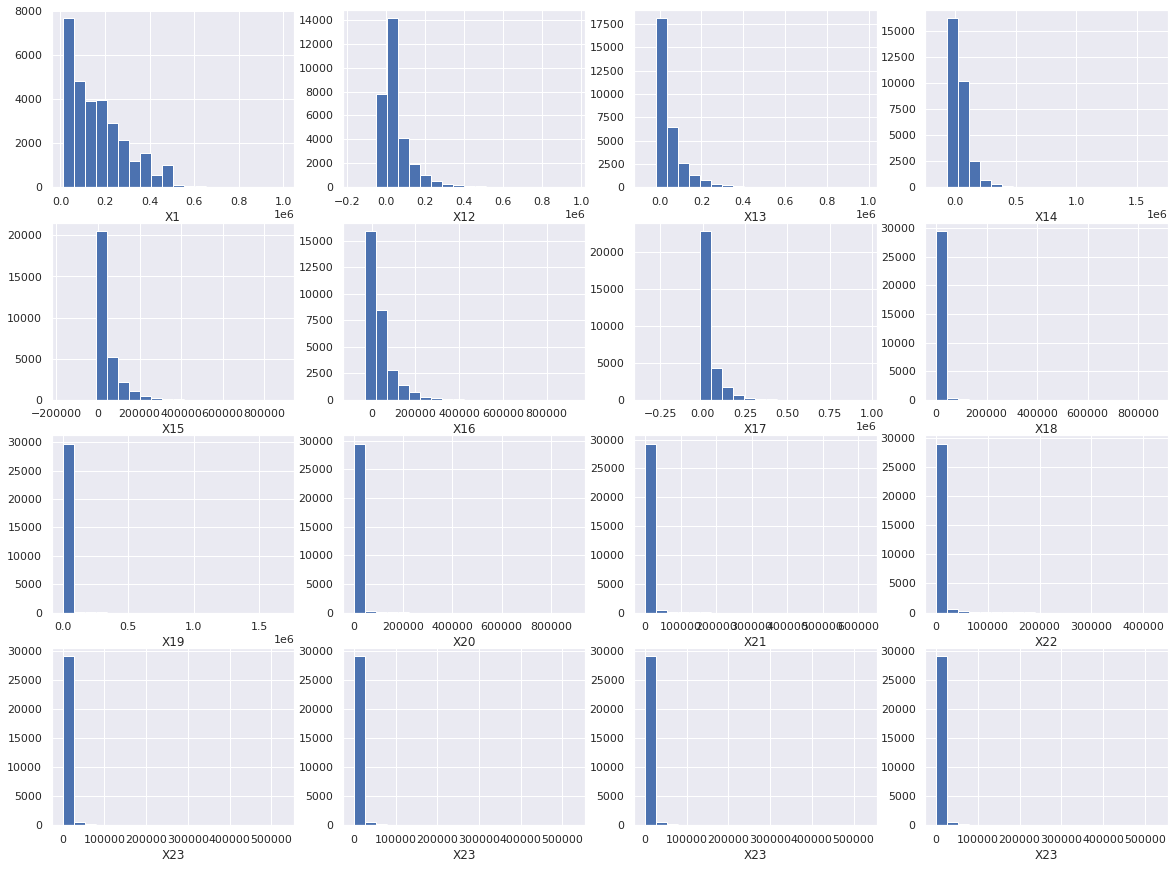

In [24]:
##Antes de escalar los datos, creo que voy a visualizarlos primero.

var_numericas = ["X1","X12", "X13", "X14", "X15", "X16", "X17", "X18", "X19", 
                 "X20", "X21", "X22", "X23", "X23", "X23", "X23"]

#var_numericas = ["X1","X12", "X13", "X14"]

sns.set(rc={'figure.figsize':(20,15)})
fig, axes = plt.subplots(4, 4)  

k = 0

for columna in var_numericas:
  plt.subplot(4,4,k+1) 

  plt.hist((df[columna]), bins = 20)
  plt.xlabel(columna)

  k = k +1

plt.show()

###**9. Visualización de los datos con diferentes estrategias de visualización**

In [ ]:
#Habiendo aprendido del ejercicio anterior que las primeras 5 variables son las que explican el 70% de la variación, entonces voy a hacer
#un nuevo dataframe con apenas 7 variables

new_df_2_columns = ["X17"]


new_df_2 = new_df[new_df_2_columns]

fig=plt.figure(1,figsize=(9,6))
ax=fig.add_subplot()
bp=ax.boxplot(new_df_2)

fig.savefig('boxplot.png',bbox_inches='tight')

#sns.pairplot(new_df_2)

KeyboardInterrupt: ignored

In [ ]:
new_df_2.head(3)